In [112]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генерируем выборки

In [113]:
N = 1000

Параметр р для биномиального распределения выбераем случайно из распределения p(x) = $c x^{5} I(0.095 < x < 0.62)$

$$\int_{0.095}^{0.62} cx^{5} dx = 1 $$

отсюда с = 105.63473178489528

In [114]:
class generator(sps.rv_continuous):
    def _pdf(self, x):
        return 105.63473178489528 * x ** 5 
generator = generator(a = 0.095, b = 0.62, name='generator')
result_p = generator.rvs(size = 1)

In [115]:
sample_bin = sps.binom.rvs(size = N, n = 50, p = result_p )

Параметр loc для нормального распределения с неизвестным математическим ожиданием выберем случайно из экспоненциального распределения с параметром 0.4

In [116]:
result_loc = sps.expon.rvs(size = 1 , scale =  1/ 0.4)

In [117]:
sample_norm_2 = sps.norm.rvs(size = N,  scale = 2.1**0.5, loc = result_loc)

Параметр scale для нормального распределения с неизвестной дисперсией выберем случайно из p(x) = $c x^{5} I(0.16 < x < 0.88)$

$$\int_{0.16}^{0.88} cx^{5} dx = 1 $$

отсюда с = 12.920249706180703

In [118]:
class generator(sps.rv_continuous):
    def _pdf(self, x):
        return 12.920249706180703 * x ** 5 
generator = generator(a = 0.16, b = 0.88, name='generator')
result_scale = generator.rvs(size = 1)

In [119]:
sample_norm_1 = sps.norm.rvs(size = N,  scale = result_scale, loc = 3)

## Оценки

In [120]:
M = 500

## $Bin(m = 50, p)$

In [123]:
effective_estimation = np.zeros(N)
estimation = np.zeros(N)

In [124]:
theta = result_p

Бутстрепные дисперсии

In [131]:
disp_eff_est = np.zeros(N)
disp_estimation = np.zeros(N)

In [133]:
effectiveEstimation = (lambda x: np.average(x) / 50.) # эффективная оценка 
otherEstimation = (lambda x: x[0] / 50.) # несмещенной оценка 𝑋1/𝑚
getVariates = (lambda N, 
               theta: sps.binom.rvs(50, theta, size = N)) 
for n in range(N):
    effective_estimation[n] = effectiveEstimation(sample_bin[:n + 1])
    estimation[n] = otherEstimation(sample_bin[:n + 1])
    #бутстрепные оценки дисперсии для эффективной и несмещенной оценки 
    disp_eff_est[n] = sps.moment([effectiveEstimation(
                    getVariates(n + 1, effective_estimation[n]))
                                  for i in range(M)], 2)
    disp_estimation[n] = sps.moment([otherEstimation(
                    getVariates(n + 1, estimation[n])) for i in range(M)], 2)
    
fisherInformation = (lambda n, theta: n * 50. / theta / (1. - theta))
    

### Кривая зависимости $\frac{1}{I_{X(\theta)}} $ от n

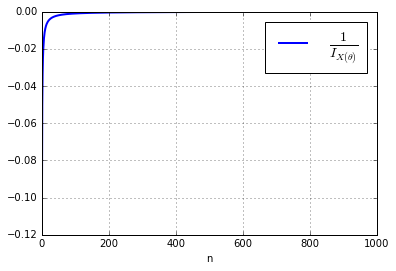

In [107]:
plt.plot(range(N), [1. / fisherInformation(i + 1, theta) 
                    for i in range(N)], 
         linewidth = 2,label = '$\\frac{1}{I_{X(\\theta)}}$')
plt.legend(fontsize = 20)
plt.xlabel('n')
plt.grid()



## Графики зависимости бутстрепных оценок дисперсий от размера выборки n

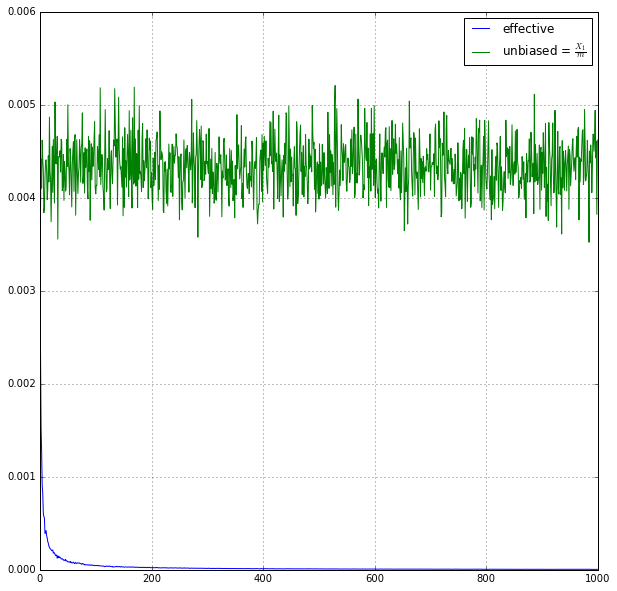

In [134]:
grid = np.linspace(0, N, 500)
plt.figure(figsize=(10, 10))
plt.plot(range(N), disp_eff_est, label = 'effective')
plt.plot(range(N), disp_estimation, label = 'unbiased = $ \\frac{X_{1}}{m}$')
plt.legend()
plt.grid()

## $Norm(a = 3, \sigma^2)$

In [136]:
effective_estimation = np.zeros(N)
estimation = np.zeros(N)

Бутстрепные дисперсии

In [137]:
disp_eff_est = np.zeros(N)
disp_estimation = np.zeros(N)

In [138]:
theta = result_scale

In [140]:
effectiveEstimation = (lambda x: np.average((x - 3) ** 2)) # эффективная оценка 
otherEstimation = (lambda x: np.median(x)) # медиана
getVariates = (lambda N, theta: sps.norm.rvs(loc = 3, 
                                             scale = theta ** 0.5, size = N)) 
for n in range(N):
    effective_estimation[n] = effectiveEstimation(sample_norm_1[:n + 1])
    estimation[n] = otherEstimation(sample_norm_1[:n + 1])
     #бутстрепные оценки дисперсии для эффективной и другой оценки 
    disp_eff_est[n] = sps.moment([effectiveEstimation(
                    getVariates(n + 1, effective_estimation[n]))
                                  for i in range(M)], 2)
    disp_estimation[n] = sps.moment([otherEstimation(
                    getVariates(n + 1, estimation[n])) for i in range(M)], 2)
    
fisherInformation = (lambda n, theta: n / (2. * theta * theta))

### Кривая зависимости $\frac{1}{I_{X(\theta)}} $ от n

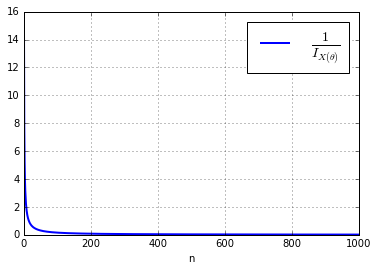

In [109]:
plt.plot(range(N), [1. / fisherInformation(i + 1, theta) for i in range(N)], 
         linewidth = 2,
         label = '$\\frac{1}{I_{X(\\theta)}}$')
plt.legend(fontsize = 20)
plt.xlabel('n')
plt.grid()

## Графики зависимости бутстрепных оценок дисперсий от размера выборки n

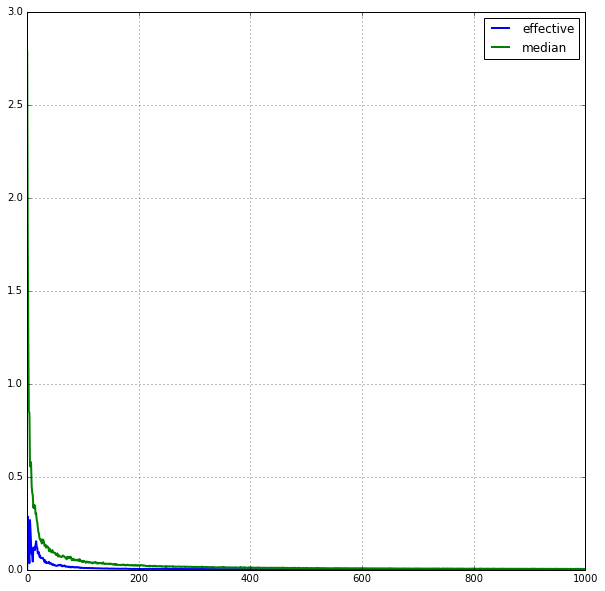

In [147]:
grid = np.linspace(0, N, 500)
plt.figure(figsize=(10, 10))
plt.plot(range(N), disp_eff_est,linewidth =2,label = 'effective')
plt.plot(range(N), disp_estimation, linewidth =2, label = 'median')
plt.legend()
plt.grid()

## $Norm(a, \sigma ^ 2 = 2.1)$

In [142]:
effective_estimation = np.zeros(N)
estimation = np.zeros(N)

In [143]:
theta = result_loc

In [144]:
effectiveEstimation = (lambda x: np.average(x)) # эффективная оценка 
otherEstimation = (lambda x: np.median(x)) # медиана
for n in range(N):
    effective_estimation[n] = effectiveEstimation(sample_norm_2[:n + 1])
    estimation[n] = otherEstimation(sample_norm_2[:n + 1])
    
fisherInformation = (lambda n, theta: n / 2.1)

### Кривая зависимости $\frac{1}{I_{X(\theta)}} $ от n

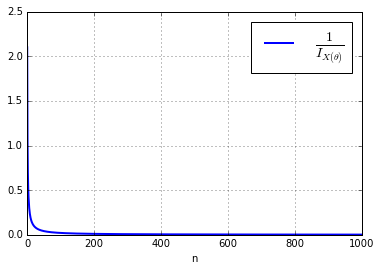

In [145]:
plt.plot(range(N), [1. / fisherInformation(i + 1, theta) for i in range(N)], 
         linewidth = 2,
         label = '$\\frac{1}{I_{X(\\theta)}}$')
plt.legend(fontsize = 20)
plt.xlabel('n')
plt.grid()